In [2]:
import numpy as np;
import pandas as  pd;
import matplotlib.pyplot as plt;
import scipy as sp;
import sklearn as sk;

In [13]:
f20 = pd.read_csv("D:/NEU/Spring 2020/SML/Project/Datasets/players_20.csv")
f20.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


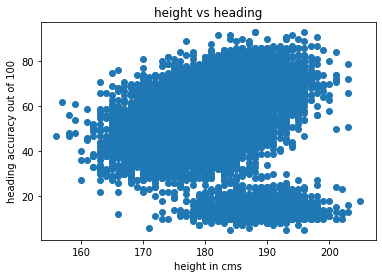

In [9]:
#ABSTRACT HYPOTHESIS:
#tall, short and strong players are statistically good at heading, dribbling and tackling
#respectively

#Tall people are good at heading:
#Scatter plot of height vs heading:
plt.scatter(f20.height_cm, f20.attacking_heading_accuracy)
plt.title("height vs heading")
plt.xlabel("height in cms")
plt.ylabel("heading accuracy out of 100")
plt.show()

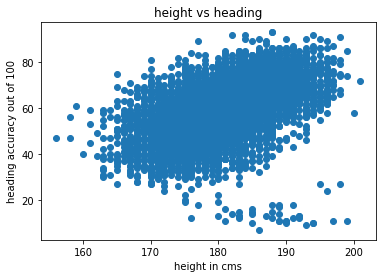

In [17]:
#2 clusters formed. #
#Examining the small cluster: most possibly GKs, subs and resserves
#Plotting again after excluding them:
f201 = f20[(f20['team_position']!="GK") & (f20['team_position']!="SUB") & (f20['team_position']!="RES") & (f20['team_position']!="")]
plt.scatter(f201.height_cm, f201.attacking_heading_accuracy)
plt.title("height vs heading")
plt.xlabel("height in cms")
plt.ylabel("heading accuracy out of 100")
plt.show()
#There is a linear relationship b/w height and heading

In [22]:
#correlation coefficent between height and heading:
f20[['height_cm','attacking_heading_accuracy']].corr(method = 'pearson')

,height_cm,attacking_heading_accuracy
height_cm,1.000000,0.010296
attacking_heading_accuracy,0.010296,1.000000


In [23]:
#correlation coefficent between height and heading:
f201[['height_cm','attacking_heading_accuracy']].corr(method = 'pearson')
#Positive correlation

,height_cm,attacking_heading_accuracy
height_cm,1.00000,0.49471
attacking_heading_accuracy,0.49471,1.00000


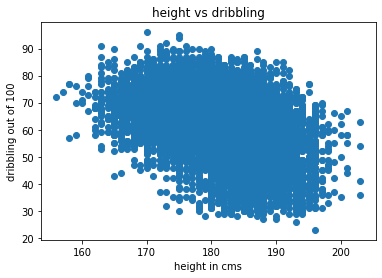

,height_cm,dribbling
height_cm,1.000000,-0.484389
dribbling,-0.484389,1.000000


In [24]:
##short players are good at dribbling:
#scatter plot of height vs dribbling:
plt.scatter(f20.height_cm, f20.dribbling)
plt.title("height vs dribbling")
plt.xlabel("height in cms")
plt.ylabel("dribbling out of 100")
plt.show()
#Linear relation

#correlation coefficent between height and dribbling:
f201[['height_cm','dribbling']].corr(method = 'pearson')
#negative correlation

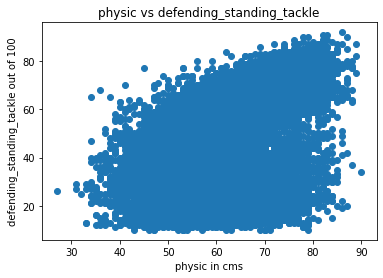

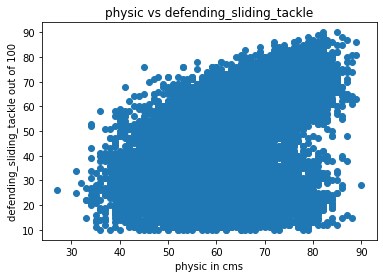

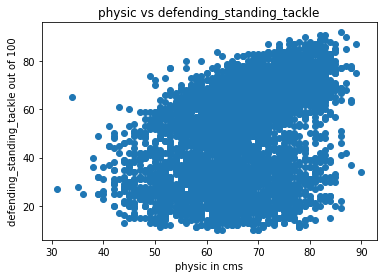

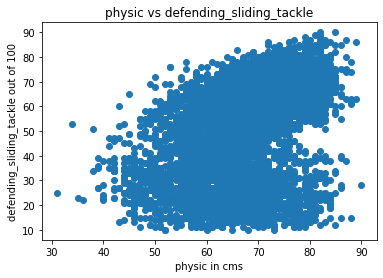

In [29]:
#strong players are good at tackling:
#scatter plot of physic vs tackling:
plt.scatter(f20.physic, f20.defending_standing_tackle)
plt.title("physic vs defending_standing_tackle")
plt.xlabel("physic in cms")
plt.ylabel("defending_standing_tackle out of 100")
plt.show()


plt.scatter(f20.physic, f20.defending_sliding_tackle)
plt.title("physic vs defending_sliding_tackle")
plt.xlabel("physic in cms")
plt.ylabel("defending_sliding_tackle out of 100")
plt.show()


plt.scatter(f201.physic, f201.defending_standing_tackle)
plt.title("physic vs defending_standing_tackle")
plt.xlabel("physic in cms")
plt.ylabel("defending_standing_tackle out of 100")
plt.show()


plt.scatter(f201.physic, f201.defending_sliding_tackle)
plt.title("physic vs defending_sliding_tackle")
plt.xlabel("physic in cms")
plt.ylabel("defending_sliding_tackle out of 100")
plt.show()


#Cant really say much since there is no discernible linear relation in all plots


In [47]:
f20[['physic','defending_standing_tackle','defending_sliding_tackle']].corr(method = 'pearson')
#There is a positive correlation but the strength of correlation is not high.


,physic,defending_standing_tackle,defending_sliding_tackle
physic,1.000000,0.489647,0.451502
defending_standing_tackle,0.489647,1.000000,0.975808
defending_sliding_tackle,0.451502,0.975808,1.000000


In [48]:
##BODY TYPE VS TACKLING:
#is there any relationship b/w body type and tackling:
f20.body_type.unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Normal', 'Lean',
       'PLAYER_BODY_TYPE_25', 'Stocky', 'Courtois', 'Shaqiri',
       'Akinfenwa'], dtype=object)

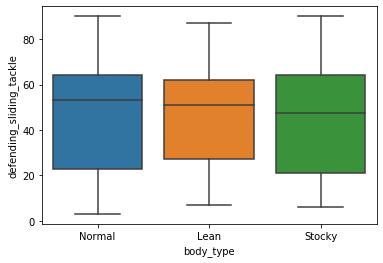

In [51]:
#boxplots of body type vs tackling:
f20bt = f20.loc[f20['body_type'].isin(['Normal','Lean','Stocky'])]
import seaborn as sns
sns.boxplot(x="body_type", y="defending_sliding_tackle", data=f20bt)
#Body type is not a good indicator for tackling ability


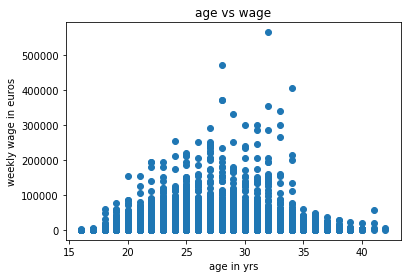

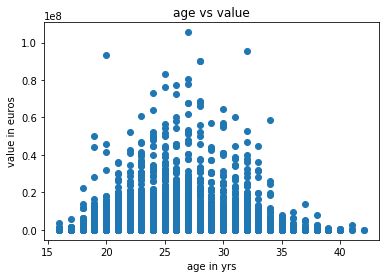

,age,wage_eur,value_eur
age,1.000000,0.151031,0.081513
wage_eur,0.151031,1.000000,0.858052
value_eur,0.081513,0.858052,1.000000


In [36]:
#####WAGE, VALUE AND AGE
plt.scatter(f20.age, f20.wage_eur)
plt.title("age vs wage")
plt.xlabel("age in yrs")
plt.ylabel("weekly wage in euros")
plt.show()

plt.scatter(f20.age, f20.value_eur)
plt.title("age vs value")
plt.xlabel("age in yrs")
plt.ylabel("value in euros")
plt.show()



f20[['age','wage_eur','value_eur']].corr(method = 'pearson')
#wage and value high positive correlation


In [44]:
#age until 28:
f2028 = f20[f20['age'] <= 28]
f2029 = f20[f20['age'] > 28]

In [45]:
f2028[['age','wage_eur','value_eur']].corr(method = 'pearson')
#weak positive correlation until age 28

,age,wage_eur,value_eur
age,1.000000,0.207704,0.179143
wage_eur,0.207704,1.000000,0.877730
value_eur,0.179143,0.877730,1.000000


In [46]:
f2029[['age','wage_eur','value_eur']].corr(method = 'pearson')
#weak -ve corelation after 29 and more

,age,wage_eur,value_eur
age,1.000000,-0.063404,-0.138282
wage_eur,-0.063404,1.000000,0.873186
value_eur,-0.138282,0.873186,1.000000


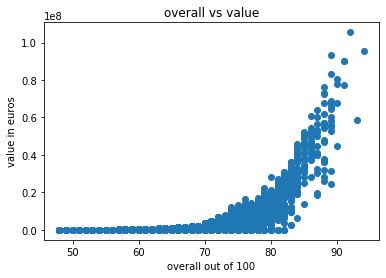

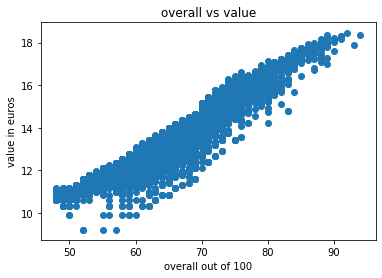

,overall,value_eur
overall,1.00000,0.63823
value_eur,0.63823,1.00000


In [56]:
####PLAYER RATING VS VALUE:
#Scatter plot of player overall vs value:
plt.scatter(f20.overall, f20.value_eur)
plt.title("overall vs value")
plt.xlabel("overall out of 100")
plt.ylabel("value in euros")
plt.show()
#Exponential increase in value as overall increases after a point of 70 overall.

#scatter plot of overall vs log transformation of value:
f20['logvalue'] = np.log(f20['value_eur'])

plt.scatter(f20.overall, f20.logvalue)
plt.title("overall vs value")
plt.xlabel("overall out of 100")
plt.ylabel("value in euros")
plt.show()
#There is a linear relationship b/w overall and log transformation of value 


f20[['overall','value_eur']].corr(method = 'pearson')
#There is a strong +ve correlation 




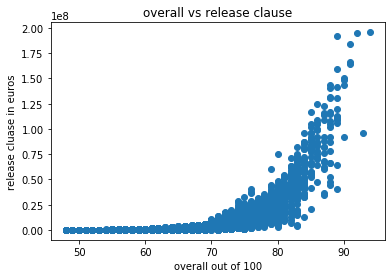

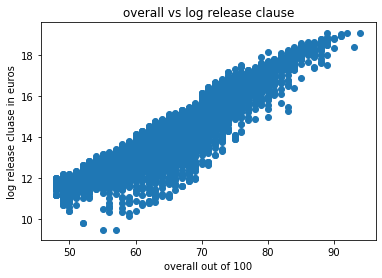

,overall,release_clause_eur
overall,1.000000,0.631286
release_clause_eur,0.631286,1.000000


In [58]:
###OVERALL VS RELEASE CLUASE:
#scatter plot:
plt.scatter(f20.overall, f20.release_clause_eur)
plt.title("overall vs release clause")
plt.xlabel("overall out of 100")
plt.ylabel("release cluase in euros")
plt.show()
#exponentail increase in release clause as overall increase after 70.

#scatter plot of overall vs log transformation of release clause:
f20['logrc'] = np.log(f20['release_clause_eur'])
plt.scatter(f20.overall, f20.logrc)
plt.title("overall vs log release clause")
plt.xlabel("overall out of 100")
plt.ylabel("log release cluase in euros")
plt.show()
#linear relationship

f20[['overall','release_clause_eur']].corr(method = 'pearson')
#strong +ve correlation


In [66]:
##Clubs with best starting 11s on fifa20:
avg_overall = f201.groupby('club', as_index=False)['overall'].mean()
avg_overall.sort_values(by=['overall'], ascending=False).head(10)
#Best 10 starting 11s on fifa20



,club,overall
224,FC Barcelona,87.4
504,Real Madrid,86.6
399,Manchester City,86.2
461,Paris Saint-Germain,85.5
388,Liverpool,85.4
226,FC Bayern München,85.3
349,Juventus,85.2
623,Tottenham Hotspur,83.7
92,Borussia Dortmund,83.5
424,Napoli,83.5


In [70]:
##Clubs with the best squad depth on fifa20:
avg_overall = f20.loc[~f20['club'].isin(['Uruguay','Mexico','Netherlands','colombia'])].groupby('club', as_index=False)['overall'].mean()
avg_overall.sort_values(by=['overall'], ascending=False).head(10)
#10 clubs with the most squad depth

,club,overall
226,FC Bayern München,81.304348
503,Real Madrid,80.121212
350,Juventus,80.060606
224,FC Barcelona,78.363636
166,Colombia,78.000000
77,Bayer 04 Leverkusen,77.280000
141,Chelsea,77.060606
400,Manchester City,77.000000
424,Napoli,76.870968
401,Manchester United,76.848485


In [72]:
#Position wise, highest ratings:
f20.groupby(['team_position'])['overall'].max()




team_position
CAM    92
CB     84
CDM    89
CF     87
CM     84
GK     91
LAM    82
LB     87
LCB    90
LCM    88
LDM    88
LF     82
LM     88
LS     87
LW     93
LWB    80
RAM    85
RB     86
RCB    88
RCM    91
RDM    85
RES    85
RF     84
RM     88
RS     85
RW     94
RWB    80
ST     89
SUB    87
Name: overall, dtype: int64

In [75]:
####BEST 11 ON FIFA20:
#We go with a 4231 formation
#Striker:
f20[f20['team_position'].isin(["ST","CF","LS","RS","LF","RF"])].iloc[f20['overall'].argmax()]
#Harry Kane

C:\Users\karth\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  after removing the cwd from sys.path.


sofifa_id                                                202126
player_url    https://sofifa.com/player/202126/harry-kane/20...
short_name                                              H. Kane
long_name                                            Harry Kane
age                                                          25
                                    ...                        
cb                                                         60+3
rcb                                                        60+3
rb                                                         62+3
logvalue                                                18.2344
logrc                                                   18.8894
Name: 12, Length: 106, dtype: object

In [76]:
#Left winger:
f20[f20['team_position'].isin(["LW"])].iloc[f20['overall'].argmax()]
#Crsitiano Ronaldo

C:\Users\karth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


sofifa_id                                                 20801
player_url    https://sofifa.com/player/20801/c-ronaldo-dos-...
short_name                                    Cristiano Ronaldo
long_name                   Cristiano Ronaldo dos Santos Aveiro
age                                                          34
                                    ...                        
cb                                                         53+3
rcb                                                        53+3
rb                                                         61+3
logvalue                                                17.8845
logrc                                                   18.3851
Name: 1, Length: 106, dtype: object

In [77]:
#Right winger:
f20[f20['team_position'].isin(["RW"])].iloc[f20['overall'].argmax()]
#Leo Messi

C:\Users\karth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


sofifa_id                                                158023
player_url    https://sofifa.com/player/158023/lionel-messi/...
short_name                                             L. Messi
long_name                        Lionel Andrés Messi Cuccittini
age                                                          32
                                    ...                        
cb                                                         52+2
rcb                                                        52+2
rb                                                         63+2
logvalue                                                18.3746
logrc                                                   19.0926
Name: 0, Length: 106, dtype: object

In [78]:
#Attacking Mid:
f20[f20['team_position'].isin(["CAM","LAM","RAM"])].iloc[f20['overall'].argmax()]
#Neymar Jr

C:\Users\karth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


sofifa_id                                                190871
player_url    https://sofifa.com/player/190871/neymar-da-sil...
short_name                                            Neymar Jr
long_name                         Neymar da Silva Santos Junior
age                                                          27
                                    ...                        
cb                                                         46+3
rcb                                                        46+3
rb                                                         61+3
logvalue                                                18.4742
logrc                                                   19.0895
Name: 2, Length: 106, dtype: object

In [79]:
#Left Mid:
f20[f20['team_position'].isin(["LCM","CDM","LDM","CM"])].iloc[f20['overall'].argmax()]
#Sergio Busquets

C:\Users\karth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


sofifa_id                                                189511
player_url    https://sofifa.com/player/189511/sergio-busque...
short_name                                      Sergio Busquets
long_name                              Sergio Busquets i Burgos
age                                                          30
                                    ...                        
cb                                                         82+3
rcb                                                        82+3
rb                                                         78+3
logvalue                                                17.8228
logrc                                                   18.5411
Name: 21, Length: 106, dtype: object

In [80]:
#Right Mid:
f20[f20['team_position'].isin(["RCM","CDM","RDM","CM"])].iloc[f20['overall'].argmax()]
#K. De Bruyne

C:\Users\karth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


sofifa_id                                                192985
player_url    https://sofifa.com/player/192985/kevin-de-bruy...
short_name                                         K. De Bruyne
long_name                                       Kevin De Bruyne
age                                                          28
                                    ...                        
cb                                                         66+3
rcb                                                        66+3
rb                                                         73+3
logvalue                                                18.3153
logrc                                                   18.9305
Name: 5, Length: 106, dtype: object

In [81]:
#Left Back:
f20[f20['team_position'].isin(["LWB","LB"])].iloc[f20['overall'].argmax()]
#Jordi Alba

C:\Users\karth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


sofifa_id                                                189332
player_url    https://sofifa.com/player/189332/jordi-alba-ra...
short_name                                           Jordi Alba
long_name                                      Jordi Alba Ramos
age                                                          30
                                    ...                        
cb                                                         78+3
rcb                                                        78+3
rb                                                         84+3
logvalue                                                17.5044
logrc                                                   18.2222
Name: 51, Length: 106, dtype: object

In [82]:
#Right Back:
f20[f20['team_position'].isin(["RWB","RB"])].iloc[f20['overall'].argmax()]
#J. Kimmich

C:\Users\karth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


sofifa_id                                                212622
player_url    https://sofifa.com/player/212622/joshua-kimmic...
short_name                                           J. Kimmich
long_name                                        Joshua Kimmich
age                                                          24
                                    ...                        
cb                                                         78+3
rcb                                                        78+3
rb                                                         81+3
logvalue                                                17.6867
logrc                                                   18.2319
Name: 61, Length: 106, dtype: object

In [83]:
#Left Centreback:
f20[f20['team_position'].isin(["LCB"])].iloc[f20['overall'].argmax()]
#V. van Dijk

C:\Users\karth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


sofifa_id                                                203376
player_url    https://sofifa.com/player/203376/virgil-van-di...
short_name                                          V. van Dijk
long_name                                       Virgil van Dijk
age                                                          27
                                    ...                        
cb                                                         87+3
rcb                                                        87+3
rb                                                         81+3
logvalue                                                18.1722
logrc                                                   18.8275
Name: 7, Length: 106, dtype: object

In [84]:
#Right Centreback:
f20[f20['team_position'].isin(["RCB"])].iloc[f20['overall'].argmax()]
#Piqué

C:\Users\karth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


sofifa_id                                                152729
player_url    https://sofifa.com/player/152729/gerard-pique-...
short_name                                                Piqué
long_name                                 Gerard Piqué Bernabéu
age                                                          32
                                    ...                        
cb                                                         85+3
rcb                                                        85+3
rb                                                         78+3
logvalue                                                17.4531
logrc                                                   18.1709
Name: 29, Length: 106, dtype: object

In [85]:
#Goalkeeper:
f20[f20['team_position'].isin(["GK"])].iloc[f20['overall'].argmax()]
J. Oblak

C:\Users\karth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


sofifa_id                                                200389
player_url    https://sofifa.com/player/200389/jan-oblak/20/...
short_name                                             J. Oblak
long_name                                             Jan Oblak
age                                                          26
                                    ...                        
cb                                                          NaN
rcb                                                         NaN
rb                                                          NaN
logvalue                                                18.1658
logrc                                                   18.9196
Name: 3, Length: 106, dtype: object

In [88]:
#Subs for this team:
f20[f20['team_position'].isin(["SUB"])].sort_values(by=['overall'], ascending=False).head(5)
#D. Mertens, K Navas, L. Sané, S. Umtiti, Isco

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,logvalue,logrc
48,175943,https://sofifa.com/player/175943/dries-mertens...,D. Mertens,Dries Mertens,32,1987-05-06,169,61,Belgium,Napoli,...,60+3,60+3,65+3,60+3,46+3,46+3,46+3,60+3,17.504390,18.035018
53,193041,https://sofifa.com/player/193041/keylor-navas/...,K. Navas,Keylor Navas,32,1986-12-15,185,80,Costa Rica,Real Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.233237,17.950677
55,222492,https://sofifa.com/player/222492/leroy-sane/20...,L. Sané,Leroy Sané,23,1996-01-11,183,75,Germany,Manchester City,...,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2,17.926384,18.644624
59,205600,https://sofifa.com/player/205600/samuel-umtiti...,S. Umtiti,Samuel Umtiti,25,1993-11-14,182,75,France,FC Barcelona,...,80+3,80+3,77+3,79+3,84+3,84+3,84+3,79+3,17.727534,18.481776
62,197781,https://sofifa.com/player/197781/francisco-rom...,Isco,Francisco Román Alarcón Suárez,27,1992-04-21,176,79,Spain,Real Madrid,...,70+3,70+3,70+3,67+3,62+3,62+3,62+3,67+3,17.747336,18.501339


In [168]:
best11 = f20[f20['short_name'].isin(["J. Oblak","Jordi Alba","V. van Dijk","Piqué","J. Kimmich","Sergio Busquets","K. De Bruyne","Neymar Jr","Cristiano Ronaldo","L. Messi","H. Kane"])]
best11 = best11[best11['long_name'] != "Herbie Kane"]
best11

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,logvalue,logrc
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,18.374637,19.092604
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,17.884537,18.385054
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,18.474222,19.089535
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.165788,18.919636
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,18.315320,18.930506
7,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,...,83+3,83+3,79+3,81+3,87+3,87+3,87+3,81+3,18.172219,18.827478
12,202126,https://sofifa.com/player/202126/harry-kane/20...,H. Kane,Harry Kane,25,1993-07-28,188,89,England,Tottenham Hotspur,...,66+3,66+3,65+3,62+3,60+3,60+3,60+3,62+3,18.234351,18.889434
21,189511,https://sofifa.com/player/189511/sergio-busque...,Sergio Busquets,Sergio Busquets i Burgos,30,1988-07-16,189,76,Spain,FC Barcelona,...,86+3,86+3,78+3,78+3,82+3,82+3,82+3,78+3,17.822844,18.541127
29,152729,https://sofifa.com/player/152729/gerard-pique-...,Piqué,Gerard Piqué Bernabéu,32,1987-02-02,194,85,Spain,FC Barcelona,...,83+3,83+3,77+3,78+3,85+3,85+3,85+3,78+3,17.453097,18.170937
51,189332,https://sofifa.com/player/189332/jordi-alba-ra...,Jordi Alba,Jordi Alba Ramos,30,1989-03-21,170,68,Spain,FC Barcelona,...,81+3,81+3,84+3,84+3,78+3,78+3,78+3,84+3,17.504390,18.222230


In [169]:
best11.reset_index(drop=True, inplace=True)
best11

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,logvalue,logrc
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2,18.374637,19.092604
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,17.884537,18.385054
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3,18.474222,19.089535
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.165788,18.919636
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,18.315320,18.930506
5,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,...,83+3,83+3,79+3,81+3,87+3,87+3,87+3,81+3,18.172219,18.827478
6,202126,https://sofifa.com/player/202126/harry-kane/20...,H. Kane,Harry Kane,25,1993-07-28,188,89,England,Tottenham Hotspur,...,66+3,66+3,65+3,62+3,60+3,60+3,60+3,62+3,18.234351,18.889434
7,189511,https://sofifa.com/player/189511/sergio-busque...,Sergio Busquets,Sergio Busquets i Burgos,30,1988-07-16,189,76,Spain,FC Barcelona,...,86+3,86+3,78+3,78+3,82+3,82+3,82+3,78+3,17.822844,18.541127
8,152729,https://sofifa.com/player/152729/gerard-pique-...,Piqué,Gerard Piqué Bernabéu,32,1987-02-02,194,85,Spain,FC Barcelona,...,83+3,83+3,77+3,78+3,85+3,85+3,85+3,78+3,17.453097,18.170937
9,189332,https://sofifa.com/player/189332/jordi-alba-ra...,Jordi Alba,Jordi Alba Ramos,30,1989-03-21,170,68,Spain,FC Barcelona,...,81+3,81+3,84+3,84+3,78+3,78+3,78+3,84+3,17.504390,18.222230


In [170]:
pos = {'X': [80,80, 65, 8, 52,20,90,52,20,32,32], 'Y': [60, 10,35, 35, 22,45,35,52,25,60,10]}
positions = pd.DataFrame(data=pos)
positions

,X,Y
0,80,60
1,80,10
2,65,35
3,8,35
4,52,22
5,20,45
6,90,35
7,52,52
8,20,25
9,32,60


In [171]:
#merging best11 and positions dfs:
bestteam = pd.concat([best11, positions], axis=1)
bestteam

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,rwb,lb,lcb,cb,rcb,rb,logvalue,logrc,X,Y
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,63+2,52+2,52+2,52+2,63+2,18.374637,19.092604,80,60
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,53+3,53+3,53+3,61+3,17.884537,18.385054,80,10
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,46+3,46+3,46+3,61+3,18.474222,19.089535,65,35
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,18.165788,18.919636,8,35
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,...,77+3,73+3,66+3,66+3,66+3,73+3,18.315320,18.930506,52,22
5,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,27,1991-07-08,193,92,Netherlands,Liverpool,...,79+3,81+3,87+3,87+3,87+3,81+3,18.172219,18.827478,20,45
6,202126,https://sofifa.com/player/202126/harry-kane/20...,H. Kane,Harry Kane,25,1993-07-28,188,89,England,Tottenham Hotspur,...,65+3,62+3,60+3,60+3,60+3,62+3,18.234351,18.889434,90,35
7,189511,https://sofifa.com/player/189511/sergio-busque...,Sergio Busquets,Sergio Busquets i Burgos,30,1988-07-16,189,76,Spain,FC Barcelona,...,78+3,78+3,82+3,82+3,82+3,78+3,17.822844,18.541127,52,52
8,152729,https://sofifa.com/player/152729/gerard-pique-...,Piqué,Gerard Piqué Bernabéu,32,1987-02-02,194,85,Spain,FC Barcelona,...,77+3,78+3,85+3,85+3,85+3,78+3,17.453097,18.170937,20,25
9,189332,https://sofifa.com/player/189332/jordi-alba-ra...,Jordi Alba,Jordi Alba Ramos,30,1989-03-21,170,68,Spain,FC Barcelona,...,84+3,84+3,78+3,78+3,78+3,84+3,17.504390,18.222230,32,60


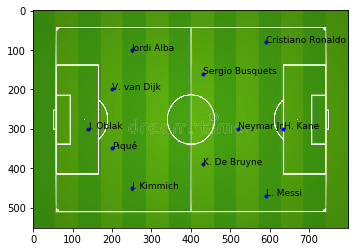

In [172]:
#Plotting the best team:
#names_bestteam = ["L. Messi","Cristiano Ronaldo","Neymar Jr","J. Oblak","K. De Bruyne","V. van Dijk","H. Kane","Sergio Busquets","Piqué","Jordi Alba","J. Kimmich"]
names_bestteam = bestteam['short_name'].to_numpy()
x_coords = [590,590, 520, 140, 430,200,635,430,200,250,250]
y_coords = [470, 80,300, 300, 390,200,300,160,350,100,450]


img = plt.imread("C:/Users/karth/OneDrive/Desktop/footballpitch.jpg")
fig, ax = plt.subplots()
ax.imshow(img)
for i,names_bestteam in enumerate(names_bestteam):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='.', color='blue')
    plt.text(x+0.3, y+0.3, names_bestteam , fontsize=9)
plt.show()

#This is the best 11 on fifa20, visualized on a football pitch.